In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
wine_df = pd.read_csv('wine_data.csv')
cw_df = pd.read_csv('chickwts_data.csv')
arrest_df = pd.read_csv('arrests_data.csv')

In [43]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [44]:
cw_df.head()

,feed_name,proteinContent,fatContent,fiberContent,calciumContent,phosphorusContent,moistureContent,ashContent,metabolizableEnergy,lysineContent,methionineContent,particleSize,density,price,shelfLife,weight
0,FirstPeck,19.5,3.2,2.4,0.82,0.78,10.8,4.5,2921,0.96,0.43,3.5,0.57,1.71,295,16.285714
1,ChickStart Plus,18.2,3.8,3.9,3.02,0.68,9.3,6.9,2865,0.99,0.37,3.4,0.70,1.67,302,20.588235
2,EarlyGrow Formula,19.3,4.6,3.2,1.20,0.69,10.2,5.8,2950,1.05,0.38,3.3,0.69,1.65,331,20.909091
3,HatchMate Premier,20.2,3.7,3.8,3.16,0.63,11.4,5.7,2866,1.11,0.38,3.2,0.74,1.71,292,23.125000
4,PeepNourish,19.2,3.9,4.2,3.06,0.61,9.3,5.9,2860,0.91,0.34,2.9,0.64,1.67,309,22.068966


In [45]:
arrest_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [46]:
wine_df.isnull().values.any(), cw_df.isnull().values.any(), arrest_df.isnull().values.any() 

(False, False, False)

In [47]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [48]:
cw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   feed_name            100 non-null    object 
 1   proteinContent       100 non-null    float64
 2   fatContent           100 non-null    float64
 3   fiberContent         100 non-null    float64
 4   calciumContent       100 non-null    float64
 5   phosphorusContent    100 non-null    float64
 6   moistureContent      100 non-null    float64
 7   ashContent           100 non-null    float64
 8   metabolizableEnergy  100 non-null    int64  
 9   lysineContent        100 non-null    float64
 10  methionineContent    100 non-null    float64
 11  particleSize         100 non-null    float64
 12  density              100 non-null    float64
 13  price                100 non-null    float64
 14  shelfLife            100 non-null    int64  
 15  weight               100 non-null    floa

In [49]:
arrest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [50]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [51]:
cw_df.describe()

,proteinContent,fatContent,fiberContent,calciumContent,phosphorusContent,moistureContent,ashContent,metabolizableEnergy,lysineContent,methionineContent,particleSize,density,price,shelfLife,weight
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,18.874000,3.990000,3.594000,1.668800,0.647800,10.418000,5.625000,2911.280000,0.942700,0.378500,2.529000,0.649500,1.654600,313.270000,27.147503
std,2.099332,0.707607,0.694832,1.177822,0.090716,0.854268,0.831498,102.461333,0.121172,0.054018,0.580716,0.055421,0.069201,12.668146,7.082035
min,15.000000,2.300000,2.300000,0.670000,0.400000,9.000000,4.100000,2711.000000,0.690000,0.260000,1.500000,0.550000,1.510000,290.000000,16.285714
25%,17.300000,3.500000,3.100000,0.855000,0.580000,9.800000,4.900000,2851.500000,0.860000,0.340000,2.000000,0.610000,1.610000,303.000000,22.000000
50%,19.050000,3.950000,3.600000,0.995000,0.645000,10.300000,5.650000,2897.500000,0.930000,0.380000,2.600000,0.650000,1.650000,313.500000,24.533333
75%,20.500000,4.500000,4.100000,3.037500,0.712500,11.200000,6.325000,2973.250000,1.022500,0.420000,3.000000,0.692500,1.690000,323.000000,31.013158
max,23.400000,5.700000,5.000000,3.950000,0.840000,11.900000,7.000000,3165.000000,1.240000,0.500000,3.500000,0.750000,1.830000,337.000000,46.250000


In [52]:
arrest_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [53]:
cw_num = ['proteinContent', 'fatContent', 'fiberContent',
          'calciumContent', 'phosphorusContent', 'moistureContent', 'ashContent',
          'metabolizableEnergy', 'lysineContent', 'methionineContent',
          'particleSize', 'density', 'price', 'shelfLife', 'weight']

arrest_num = ['Murder', 'Assault', 'UrbanPop', 'Rape']

#scaler = StandardScaler()
#wine_scaled = scaler.fit_transform(wine_df)
#cw_scaled = scaler.fit_transform(cw_df[cw_num])
#arrest_scaled = scaler.fit_transform(arrest_df[arrest_num])

In [54]:
wine_scaled.shape, cw_scaled.shape, arrest_scaled.shape

((178, 14), (100, 15), (50, 4))

# Wine Knn

In [55]:
wine_df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

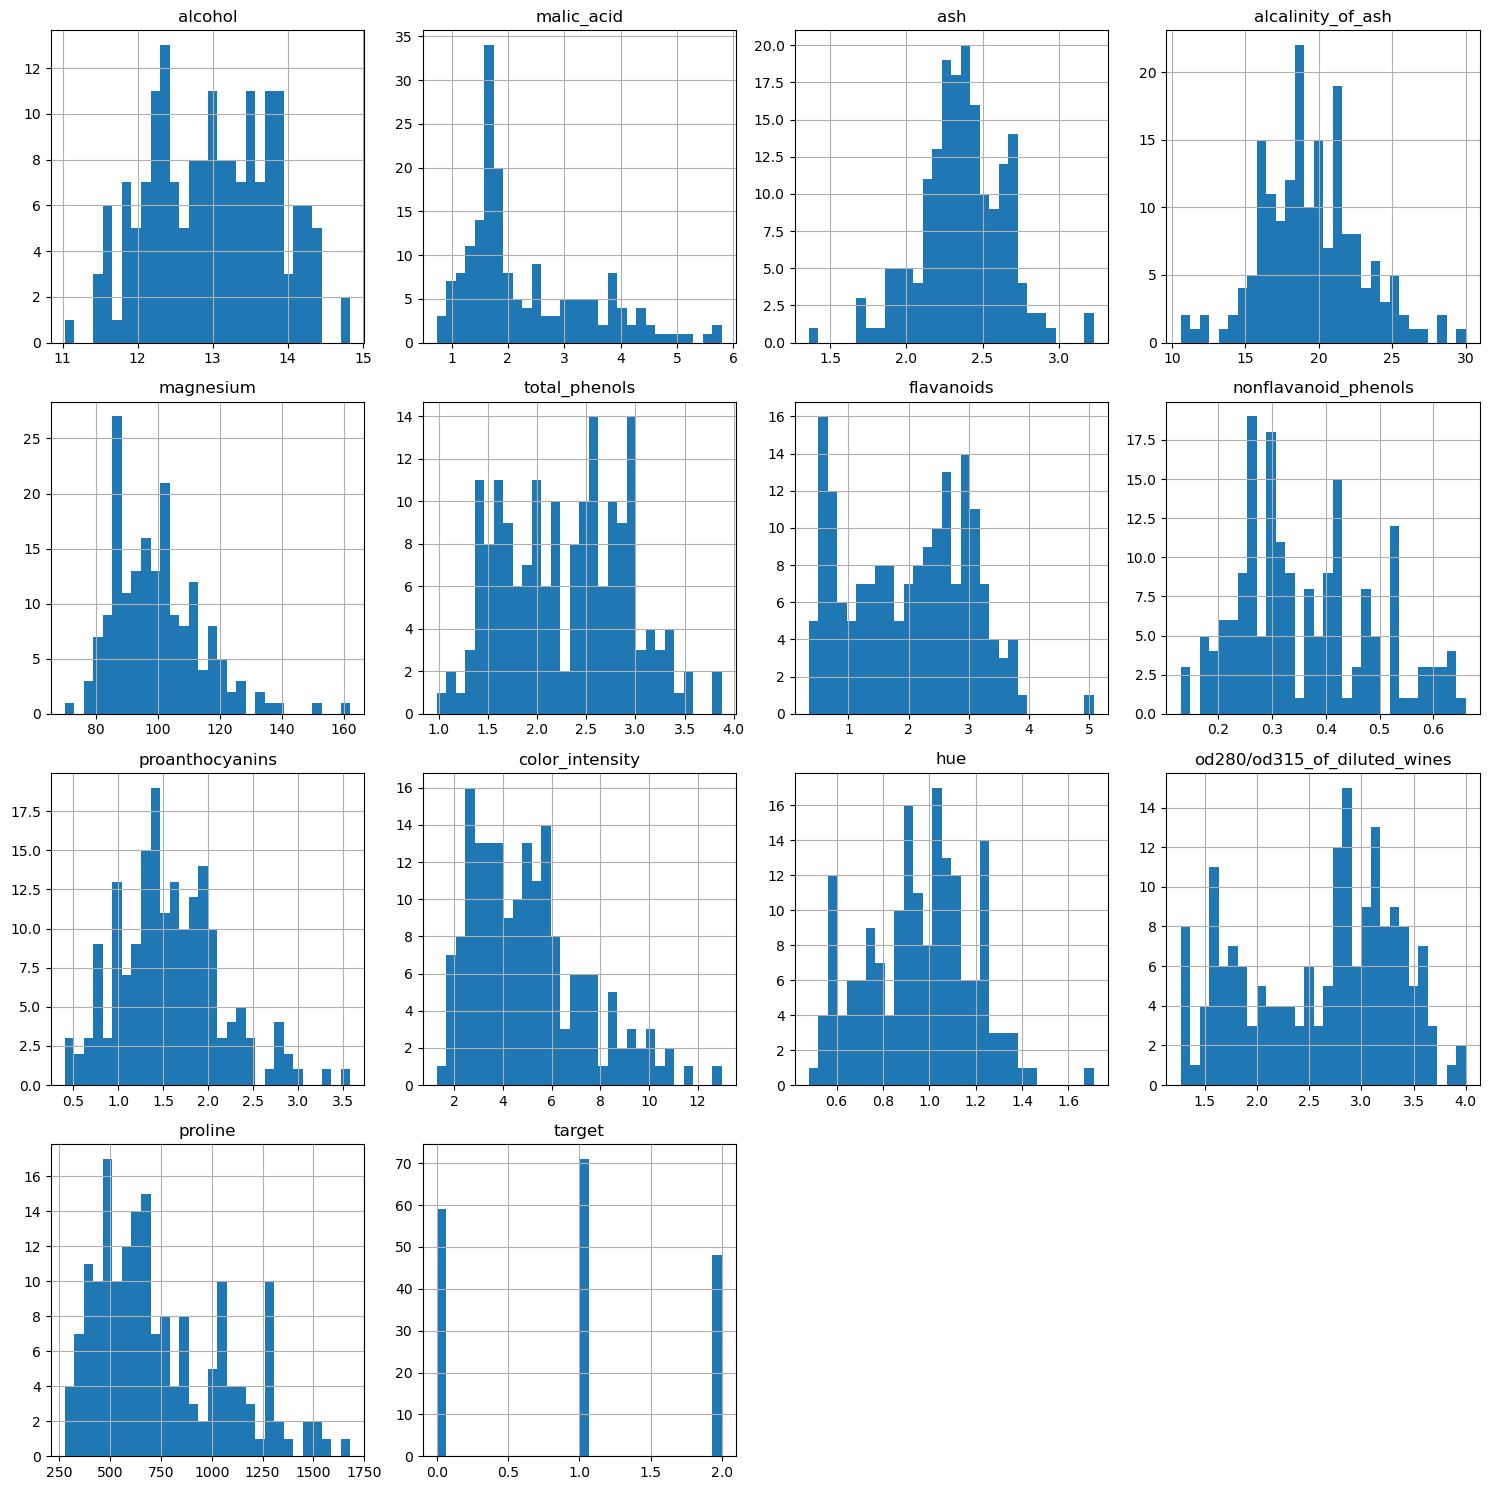

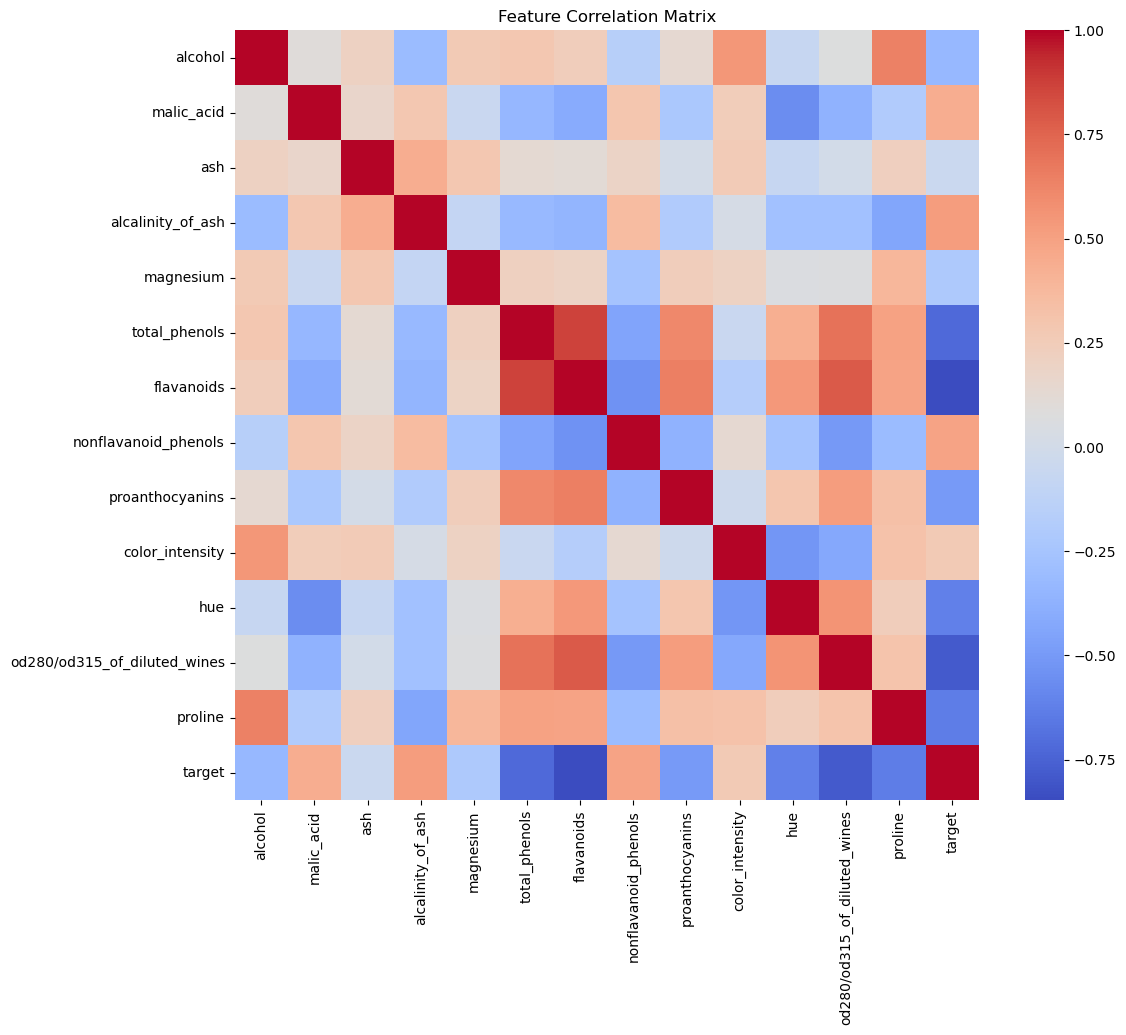

In [56]:
plt.figure(figsize=(12, 8))
wine_df.hist(figsize=(15, 15), bins=30)
plt.tight_layout()
plt.show()

# Check for feature correlations
plt.figure(figsize=(12, 10))
wine_cm = wine_df.corr()
sns.heatmap(wine_cm, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [57]:
X = wine_df.drop(columns = 'target')
y = wine_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [62]:
param_grid = {
    'n_neighbors': list(range(1, 31, 2)),
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

best_knn = grid_search.best_estimator_
best_knn.fit(X_train_pca, y_train)

y_pred = best_knn.predict(X_test_pca)

print("✅ Best Parameters:", grid_search.best_params_)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🎯 Accuracy Score:", accuracy_score(y_test, y_pred))

✅ Best Parameters: {'metric': 'euclidean', 'n_neighbors': 27, 'weights': 'uniform'}

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

🎯 Accuracy Score: 1.0


# Chickwts recommendation

In [68]:
cw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   feed_name            100 non-null    object 
 1   proteinContent       100 non-null    float64
 2   fatContent           100 non-null    float64
 3   fiberContent         100 non-null    float64
 4   calciumContent       100 non-null    float64
 5   phosphorusContent    100 non-null    float64
 6   moistureContent      100 non-null    float64
 7   ashContent           100 non-null    float64
 8   metabolizableEnergy  100 non-null    int64  
 9   lysineContent        100 non-null    float64
 10  methionineContent    100 non-null    float64
 11  particleSize         100 non-null    float64
 12  density              100 non-null    float64
 13  price                100 non-null    float64
 14  shelfLife            100 non-null    int64  
 15  weight               100 non-null    floa

<Figure size 1200x800 with 0 Axes>

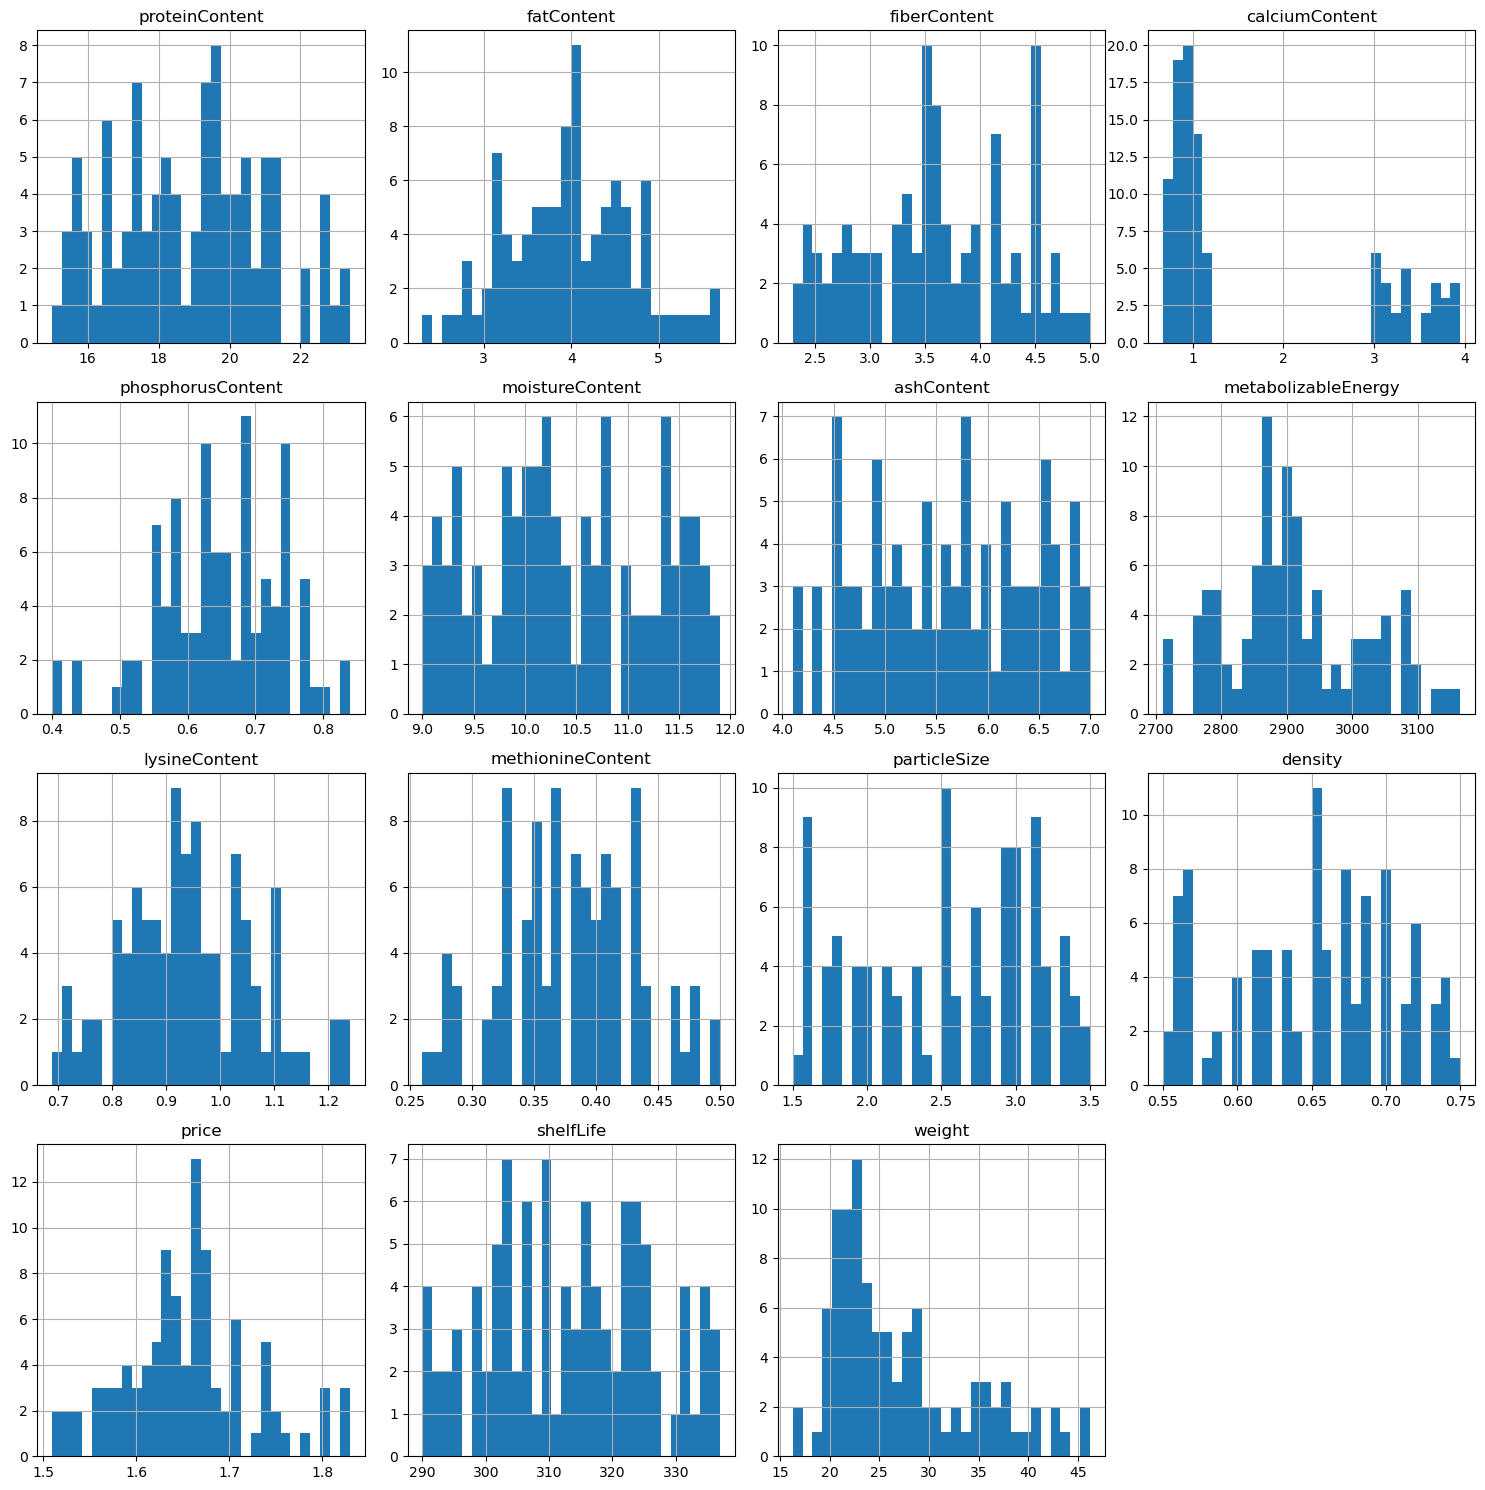

ValueError: could not convert string to float: 'FirstPeck'

<Figure size 1200x1000 with 0 Axes>

In [66]:
plt.figure(figsize=(12, 8))
cw_df.hist(figsize=(15, 15), bins=30)
plt.tight_layout()
plt.show()

# Check for feature correlations
plt.figure(figsize=(12, 10))
cw_cm = cw_df.corr()
sns.heatmap(cw_cm, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [65]:
# 1. Standardize the 'weight' feature
scaler = StandardScaler()
weights_scaled = scaler.fit_transform(cw_df[['weight']])  # 2D array

# 2. Apply PCA to reduce to 1 component
pca = PCA(n_components=1, random_state=42)
weights_pca = pca.fit_transform(weights_scaled)

# 3. Compute cosine similarity matrix between feeds
# Each feed is represented by its 1D PCA component
cos_sim_matrix = cosine_similarity(weights_pca)

# 4. Create a DataFrame of cosine similarity for readability
cos_sim_df = pd.DataFrame(cos_sim_matrix, index=cw_df['feed_type'], columns=cw_df['feed_type'])

# 5. Function to recommend top N similar feeds for a given feed
def recommend_similar_feeds(feed_name, top_n=5):
    if feed_name not in cos_sim_df.index:
        return f"Feed '{feed_name}' not found."
    
    # Sort similarity scores descending, exclude self
    similar_scores = cos_sim_df.loc[feed_name].drop(feed_name).sort_values(ascending=False)
    recommendations = similar_scores.head(top_n)
    return recommendations

# Example: Recommend feeds similar to 'Feed_A' (replace with actual feed name)
print(recommend_similar_feeds('Feed_A', top_n=3))

KeyError: 'feed_type'